# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama:** Alisha Anggranidi Salsabila
- **Email:** anggranidi@gmail.com
- **ID Dicoding:** MC012D5X2354

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Musim dengan jumlah penyewaan terbanyak
- Pertanyaan 2: Jam berapa yang memiliki jumlah penyewaan terbanyak dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour = pd.read_csv("hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi informasi penyewaan sepeda per hari
- Dataset hour.csv berisi informasi penyewaan sepeda per jam

### Assessing Data

In [ ]:
df_hour.info()
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [ ]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing values
- Tidak ada kolom duplikat

### Cleaning Data

In [ ]:
df_hour.drop(['workingday'], axis = 1, inplace= True)
df_day.drop(['workingday'], axis = 1, inplace= True)

menghapus kolom instant karena tidak ada hubungannya dan workingday karena suda diwakili oleh weekday

In [ ]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
   df_day[column] =  df_day[column].astype("category")
   df_hour[column] =  df_hour[column].astype("category")

merubah tipe data int karena memiliki data dengan beberapa varian

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [ ]:
df_day.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [ ]:
df_hour.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [ ]:
df_hour['month'] = df_hour['month'].astype('category')
df_hour['month'] = df_hour['month'].cat.rename_categories({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

df_day['weather_situation'] = df_day['weather_situation'].astype('category')
df_day['weather_situation'] = df_day['weather_situation'].cat.rename_categories({
    1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'
})

df_hour['weather_situation'] = df_hour['weather_situation'].astype('category')
df_hour['weather_situation'] = df_hour['weather_situation'].cat.rename_categories({
    1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'
})

df_day['one_of_week'] = df_day['one_of_week'].astype('category')
df_day['one_of_week'] = df_day['one_of_week'].cat.rename_categories({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

df_hour['one_of_week'] = df_hour['one_of_week'].astype('category')
df_hour['one_of_week'] = df_hour['one_of_week'].cat.rename_categories({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

df_day['year'] = df_day['year'].astype('category')
df_day['year'] = df_day['year'].cat.rename_categories({0: '2011', 1: '2012'})

df_hour['year'] = df_hour['year'].astype('category')
df_hour['year'] = df_hour['year'].cat.rename_categories({0: '2011', 1: '2012'})


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24932\1477654129.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_hour['month'] = df_hour['month'].replace(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24932\1477654129.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_day['weather_situation'] = df_day['weather_situation'].replace(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24932\1477654129.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cas

**Insight:**
- Mengubah tipe data int pada season, mnth, holiday, weekday, workingday, weathersit menjadi category
- mengganti nama kolom dan konversi isi kolom agar lebih mudah dimengerti

## Exploratory Data Analysis (EDA)

### Explore data hour_df

In [ ]:
df_hour.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379.0,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,2012,Jul,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df_hour.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight:**
- Penyewaan terbanyak di jam 17.00
- Penyewaan paling sedikit di jam 04.00

### Explore data day_df

In [ ]:
df_day.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731.0,731,731.0,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2,12.0,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,2012,1.0,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366,62.0,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_day.groupby(by="season", observed=False)["count_cr"].sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


**Insight:**
- musim terbanyak pada musim fall

## Visualization & Explanatory Analysis



### Pertanyaan 1: Musim dengan jumlah penyewaan terbanyak

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24932\635538233.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = df_day.groupby('season')['count_cr'].sum().reindex(seasons)


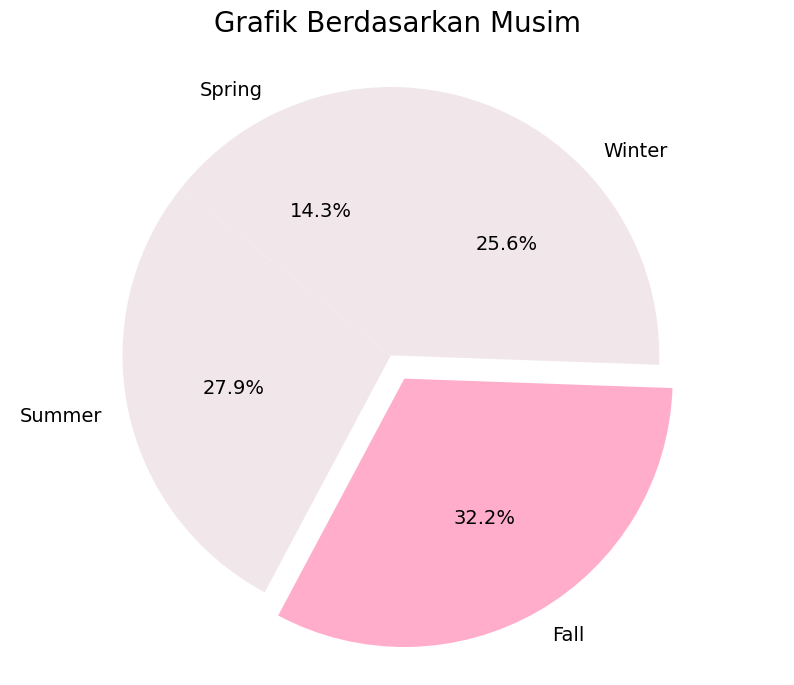

In [ ]:
import matplotlib.pyplot as plt

df_day['season'] = df_day['season'].astype('category')

seasons = df_day['season'].cat.categories
season_counts = df_day.groupby('season', observed=True)['count_cr'].sum().reindex(seasons)

labels = ["Spring", "Summer", "Fall", "Winter"]
values = season_counts.values

colors = ["#F1E7EB", "#F1E7EB", "#FFADCB", "#F1E7EB"]
explode = (0, 0, 0.1, 0)

plt.figure(figsize=(10, 8))
plt.pie(
    x=values,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 14}
)

plt.title("Grafik Berdasarkan Musim", fontsize=20, pad=20)
plt.axis('equal')

plt.show()

**Insight:**
- Berdasarkan grafik musim paling banyak pada musim gugur sekitar 32%  

### Pertanyaan 2: Jam berapa yang memiliki jumlah penyewaan terbanyak dan paling sedikit?

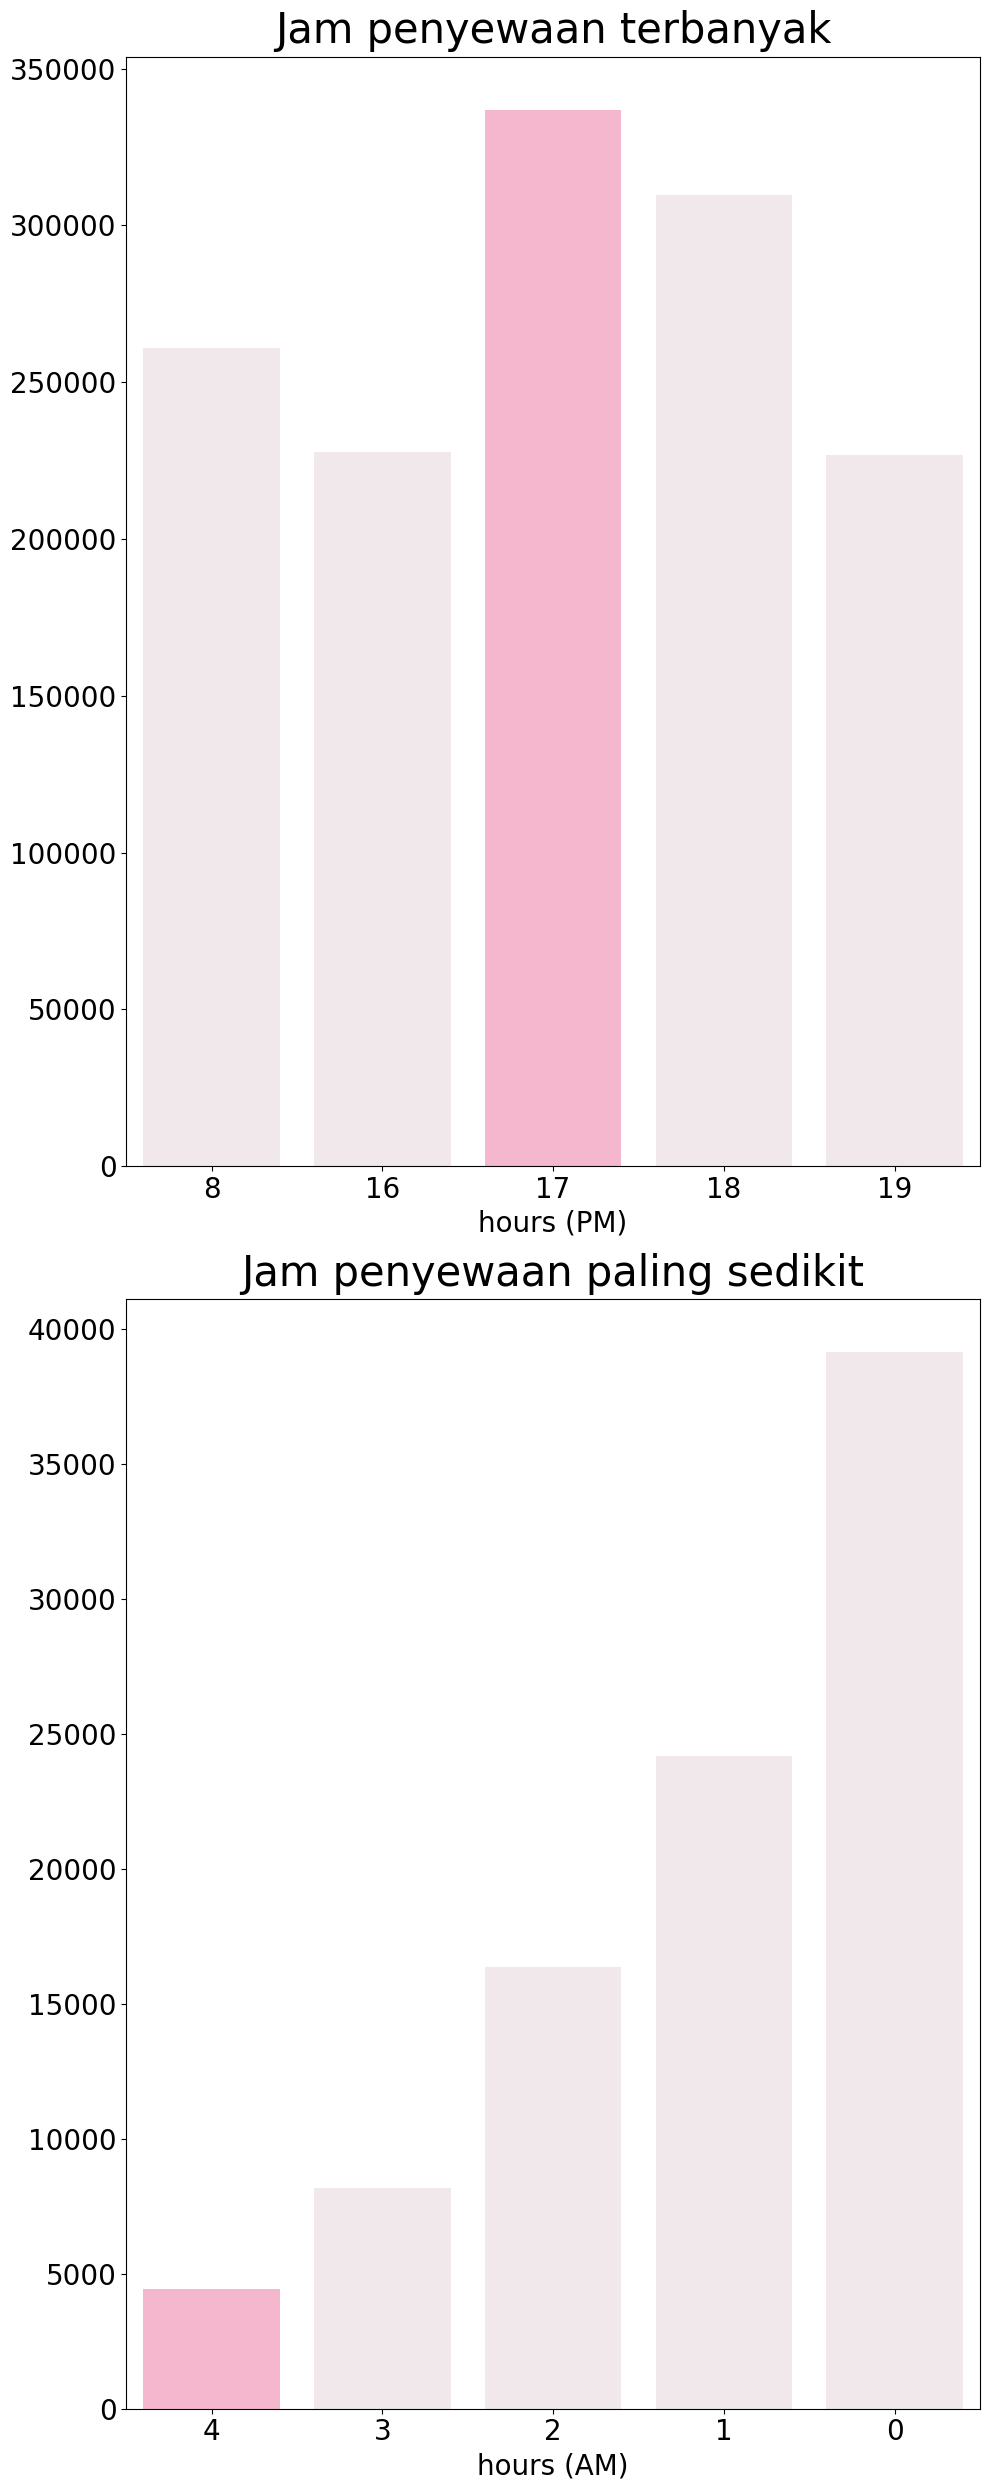

In [ ]:
sum_order_items_df = df_hour.groupby("hours")["count_cr"].sum().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 25))

sns.barplot(
    x="hours", y="count_cr", data=sum_order_items_df.head(5),
    hue="hours", palette=["#F1E7EB", "#F1E7EB", "#FFADCB", "#F1E7EB", "#F1E7EB"],
    legend=False, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("hours (PM)", fontsize=20)
ax[0].set_title("Jam penyewaan terbanyak", loc="center", fontsize=30, pad=10)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20)

sns.barplot(
    x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5),
    hue="hours", palette=["#F1E7EB", "#F1E7EB", "#F1E7EB", "#F1E7EB", "#FFADCB"],
    legend=False, ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("hours (AM)", fontsize=20)
ax[1].set_title("Jam penyewaan paling sedikit", loc="center", fontsize=30, pad=10)
ax[1].invert_xaxis()
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan grafik pertama penyewaan sepeda terbanyak pada jam 17:00 sekitar 336860 penyewaan
- Berdasarkan grafik kedua penyewaan sepeda paling sedikit pada jam 04:00 sekitar 4428 penyewaan

## Analisis Lanjutan (Opsional)

# Clustering berdasarkan Weather

In [83]:
df_hour.groupby(by="weather_situation", observed=True)["count_cr"].nunique().sort_values(ascending=False)

weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_cr, dtype: int64

# RFM Analysis

In [84]:
latest_date = df_hour['dteday'].max()

rfm_data = df_hour.groupby('registered').agg({
    'dteday': lambda date_column: (latest_date - date_column.max()).days,
    'instant': 'size',
    'count_cr': 'sum'
}).reset_index()

rfm_data.rename(columns={'dteday': 'Recency', 'instant': 'Frequency', 'count_cr': 'Monetary'}, inplace=True)

print(rfm_data.head())


   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


# Conclusion

- Conclution pertanyaan 1 adalah pada fall season atau musim gugur
- Conclution pertanyaan 2 ialah penyewaan sepeda terbanyak pada jam 17:00 sedangkan paling sedikit pada jam 04:00